<a href="https://colab.research.google.com/github/Nirmala-debug/CN6005AI/blob/main/week3python_notebook_for_binary_class_with_db_cvs_file.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Column names (optional if your CSV already has headers)
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

# Full path to your CSV file
csvfilePath = '/content/week3/lab3/diabetesN (1).csv'

# Load dataset
pima = pd.read_csv(csvfilePath, names=col_names, header=0)  # header=0 if your CSV has headers

# Preview the first 5 rows
pima.head()


,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
pima['glucose'].value_counts()

,count
glucose,
99,17
100,17
111,14
125,14
129,14
...,...
56,1
169,1
149,1


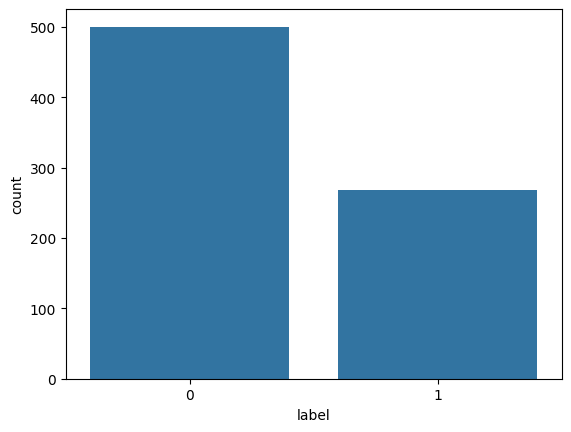

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# count plot on single categorical variable
sns.countplot(x ='label', data =pima )

# Show the plot
plt.show()

In [ ]:
import pandas as pd

# Load the CSV file with the correct path and filename
pima = pd.read_csv("/content/week3/lab3/diabetesN (1).csv")

# Count non-diabetics and diabetics
count_no_sub = len(pima[pima['Outcome'] == 0])
count_sub = len(pima[pima['Outcome'] == 1])

# Calculate percentages
pct_of_no_sub = count_no_sub / (count_no_sub + count_sub)
pct_of_sub = count_sub / (count_no_sub + count_sub)

# Print percentages
print("percentage of no Diabetics is", pct_of_no_sub * 100)
print("percentage of Diabetics", pct_of_sub * 100)


percentage of no Diabetics is 65.10416666666666
percentage of Diabetics 34.89583333333333


In [ ]:
pima.groupby('label').mean()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age
label,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [ ]:
print(pd.read_csv('/content/week3/lab3/diabetesN (1).csv').columns.tolist())


['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


In [ ]:
# Split dataset into features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age', 'glucose', 'bp', 'pedigree']
X = pima[feature_cols]   # Features
y = pima['label']        # Target variable

# Preview
print(X.head())
print(y.head())



   pregnant  insulin   bmi  age  glucose  bp  pedigree
0         6        0  33.6   50      148  72     0.627
1         1        0  26.6   31       85  66     0.351
2         8        0  23.3   32      183  64     0.672
3         1       94  28.1   21       89  66     0.167
4         0      168  43.1   33      137  40     2.288
0    1
1    0
2    1
3    0
4    1
Name: label, dtype: int64


In [ ]:
#split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

In [ ]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#let see how many  0 and 1 are in outcome for test dataset
print(y_test.value_counts())

label
0    125
1     67
Name: count, dtype: int64


In [ ]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[115,  10],
       [ 25,  42]])

Text(0.5, 427.9555555555555, 'Predicted label')

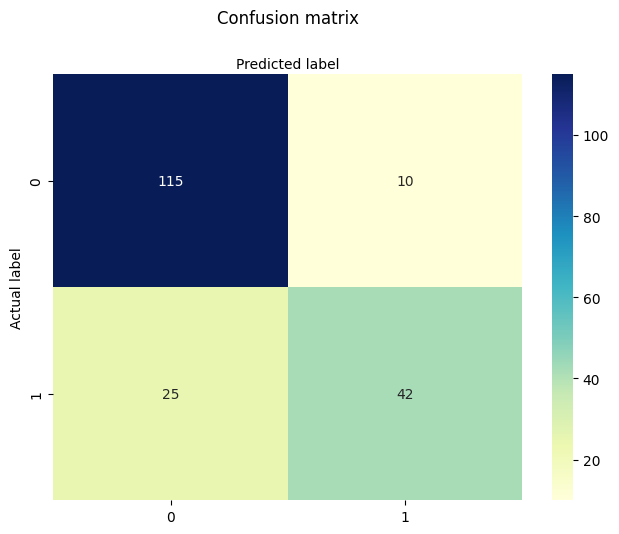

In [ ]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))

0.8076923076923077
0.6268656716417911


In [ ]:
from sklearn.metrics import classification_report
target_names = ['without diabetes', 'with diabetes']
print(classification_report(y_test, y_pred, target_names=target_names))

                  precision    recall  f1-score   support

without diabetes       0.82      0.92      0.87       125
   with diabetes       0.81      0.63      0.71        67

        accuracy                           0.82       192
       macro avg       0.81      0.77      0.79       192
    weighted avg       0.82      0.82      0.81       192



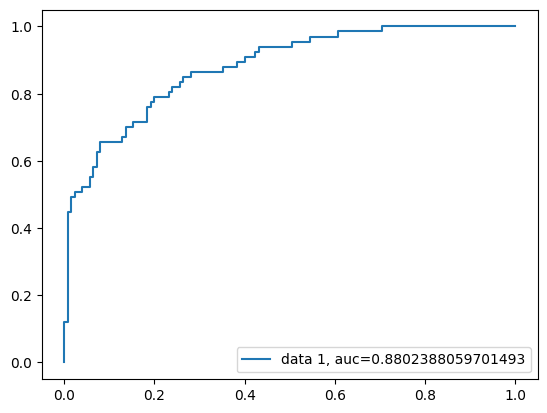

In [ ]:
#Roc
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

using SMOTE


In [ ]:
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE().fit_resample(X,y)
y_resampled.value_counts()

,count
label,
1,500
0,500


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=16)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[97, 32],
       [33, 88]])

Text(0.5, 427.9555555555555, 'Predicted label')

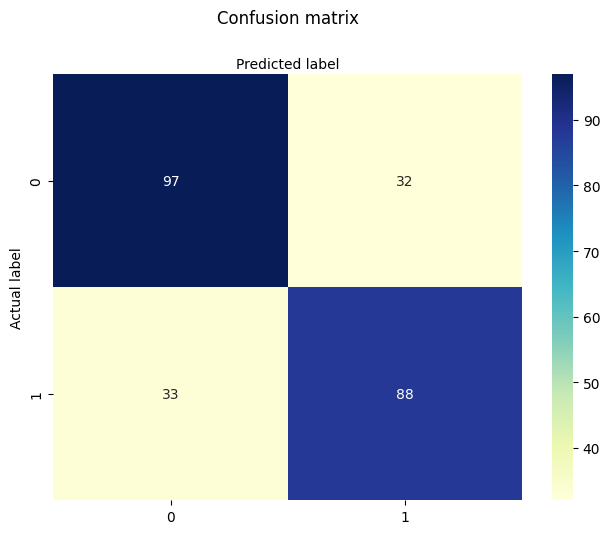

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))

0.7333333333333333
0.7272727272727273


In [ ]:
from sklearn.metrics import classification_report
target_names = ['without diabetes', 'with diabetes']
print(classification_report(y_test, y_pred, target_names=target_names))

                  precision    recall  f1-score   support

without diabetes       0.75      0.75      0.75       129
   with diabetes       0.73      0.73      0.73       121

        accuracy                           0.74       250
       macro avg       0.74      0.74      0.74       250
    weighted avg       0.74      0.74      0.74       250



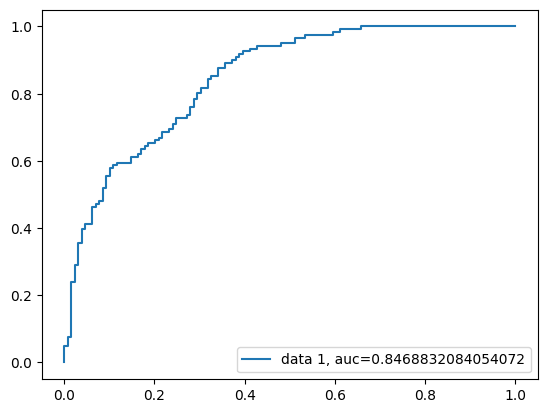

In [ ]:
#Roc
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Multiclassification code week3



In [ ]:
import pandas as pd; import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
#Setting display format to retina in matplotlib to see better quality images.
from IPython.display import set_matplotlib_formats

# Lines below are just to ignore warnings
from sklearn.datasets import load_iris
iris= load_iris()
print(iris.feature_names)
print(iris.target)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
# Convert the iris dataset to a pandas dataframe
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Add the target variable to the dataframe
df['target'] = iris.target

# Print the first 5 rows of the dataframe
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [ ]:
##Separating features and the target
#Let’s separate features and the target in X and y respectively.
X= df.loc[:, ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
print(X)
Y=df['target']

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


In [ ]:
print(df.shape)
print(df.info())
print(df.target.value_counts())

(150, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
None
target
0    50
1    50
2    50
Name: count, dtype: int64


In [ ]:
#split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=16)
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(multi_class='ovr')

# fit the model with data
logreg.fit(X_train, y_train)
print(logreg.score(X_train, y_train))
#y_pred = logreg.predict(X_test)
y_pred = logreg.predict(X_test)


0.9553571428571429


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [ ]:
#From sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[13,  0,  0],
       [ 0, 11,  4],
       [ 0,  2,  8]])

Text(0.5, 427.9555555555555, 'Predicted label')

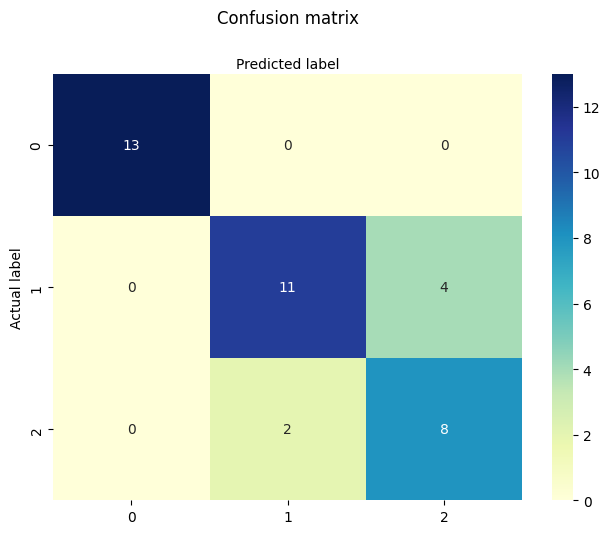

In [ ]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
from sklearn.metrics import classification_report
target_names = ['0', '1','2']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.85      0.73      0.79        15
           2       0.67      0.80      0.73        10

    accuracy                           0.84        38
   macro avg       0.84      0.84      0.84        38
weighted avg       0.85      0.84      0.84        38



In [ ]:
logreg.predict_proba(X_test)[:3]

array([[8.61630554e-03, 3.33035415e-01, 6.58348279e-01],
       [9.58421761e-01, 4.15726856e-02, 5.55358738e-06],
       [8.28109799e-03, 3.76269848e-01, 6.15449054e-01]])

using binary class binary classification for titanic.csv


In [ ]:
import pandas as pd

# Corrected column names
col_names = ['passenger','Pclass','sex','Age','Ticket','Fare','Survived']

# Correct CSV path (update this to your actual path if different)
csvfilePath = 'titanic (1) (10).csv'

# Load dataset
Allen = pd.read_csv(csvfilePath, names=col_names, header=0)  # header=0 if CSV already has headers
Allen.head()


,passenger,Pclass,sex,Age,Ticket,Fare,Survived
1,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,0
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,1
3,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,1
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,1
5,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,0


In [ ]:
Allen['Age'].value_counts()

,count
Age,
24.00,30
22.00,27
18.00,26
28.00,25
30.00,25
...,...
24.50,1
0.67,1
0.42,1


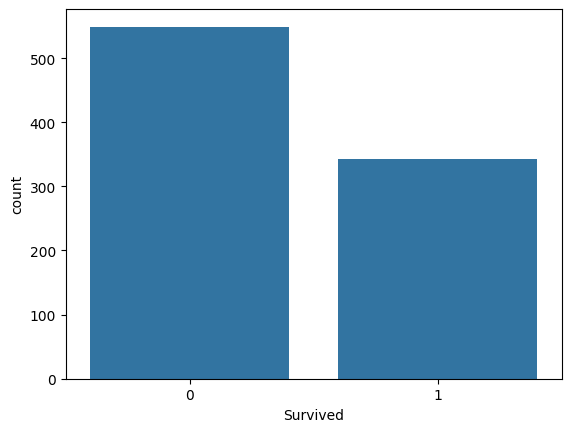

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# count plot on single categorical variable
sns.countplot(x ='Survived', data =Allen )

# Show the plot
plt.show()

In [ ]:
# Count the number of passengers who did not survive
count_no_sub = len(Allen[Allen['Survived']==0])

# Count the number of passengers who survived
count_sub = len(Allen[Allen['Survived']==1])

# Percentage calculations
pct_of_no_sub = count_no_sub / (count_no_sub + count_sub)
print("Percentage of not survived:", pct_of_no_sub * 100)

pct_of_sub = count_sub / (count_no_sub + count_sub)
print("Percentage of survived:", pct_of_sub * 100)


Percentage of not survived: 61.61616161616161
Percentage of survived: 38.38383838383838


In [ ]:
# Select numeric columns only
numeric_cols = Allen.select_dtypes(include='number')

# Group by 'Survived' and calculate mean of numeric columns
grouped = numeric_cols.groupby(Allen['Survived']).mean()
print(grouped)


          PassengerId    Pclass        Age       Fare  Survived
Survived                                                       
0          447.016393  2.531876  30.626179  22.117887       0.0
1          444.368421  1.950292  28.343690  48.395408       1.0


In [ ]:
# Split dataset into features and target variable for Titanic
# Features: columns that help predict survival
feature_cols = ['Pclass', 'Sex', 'Age', 'Fare']  # you can add more numeric features if needed

# Convert categorical features like 'Sex' to numeric (0/1)
Allen['Sex'] = Allen['Sex'].map({'male': 0, 'female': 1})

X = Allen[feature_cols]  # Features
y = Allen['Survived']    # Target variable

# Display
print(X.head())
print(y.head())


   Pclass  Sex   Age     Fare
0       3    0  22.0   7.2500
1       1    1  38.0  71.2833
2       3    1  26.0   7.9250
3       1    1  35.0  53.1000
4       3    0  35.0   8.0500
0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer

# 1️⃣ Load the dataset
csvfilePath = 'titanic (1) (10).csv'  # 👈 update if your file path differs
Allen = pd.read_csv(csvfilePath)

# 2️⃣ Clean and prepare data
Allen['Sex'] = Allen['Sex'].astype(str).str.strip().str.lower().map({'male': 0, 'female': 1})

# 3️⃣ Select numeric features
feature_cols = ['Pclass', 'Sex', 'Age', 'Fare']
X = Allen[feature_cols]
y = Allen['Survived']

# 4️⃣ Handle missing values (e.g., Age)
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=feature_cols)

# 5️⃣ Split data into training/testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 6️⃣ Train logistic regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# 7️⃣ Predict and evaluate
y_pred = logreg.predict(X_test)
accuracy = (y_pred == y_test).mean()
print("✅ Model trained successfully!")
print("🎯 Accuracy:", round(accuracy * 100, 2), "%")


✅ Model trained successfully!
🎯 Accuracy: 79.48 %


In [ ]:
import os

# Check what's inside /content/sample_data
os.listdir('/content/sample_data')


['anscombe.json',
 'README.md',
 'mnist_test.csv',
 'california_housing_test.csv',
 'california_housing_train.csv',
 'mnist_train_small.csv']

In [ ]:
csvfilePath = 'titanic (1) (10).csv'
Allen = pd.read_csv(csvfilePath)


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving titanic (1) (10).csv to titanic (1) (10).csv


In [ ]:
import pandas as pd
list(uploaded.keys())


['titanic (1) (10).csv']

In [ ]:
Allen = pd.read_csv('titanic (1) (10).csv')  # or whatever exact name appears above


In [19]:
print(y_test.value_counts())

Survived
0    157
1    111
Name: count, dtype: int64


In [20]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[134,  23],
       [ 32,  79]])

Text(0.5, 427.9555555555555, 'Predicted label')

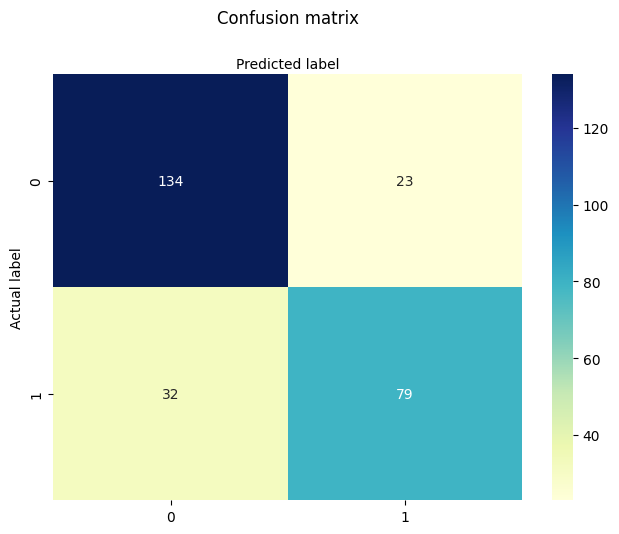

In [21]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [22]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))

0.7745098039215687
0.7117117117117117


In [23]:
from sklearn.metrics import classification_report

# Replace diabetes labels with Titanic survival labels
target_names = ['Did not survive', 'Survived']

print(classification_report(y_test, y_pred, target_names=target_names))


                 precision    recall  f1-score   support

Did not survive       0.81      0.85      0.83       157
       Survived       0.77      0.71      0.74       111

       accuracy                           0.79       268
      macro avg       0.79      0.78      0.79       268
   weighted avg       0.79      0.79      0.79       268



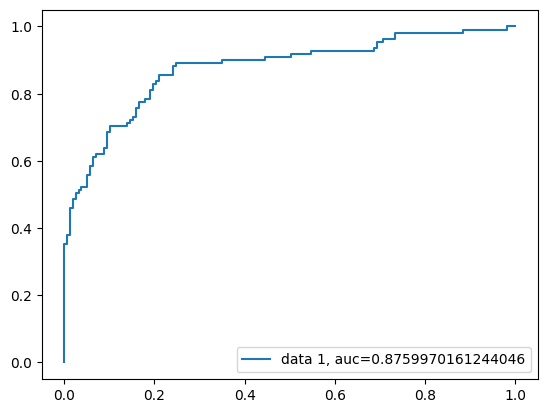

In [24]:
#Roc
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

using SMOTE for titanic file



In [25]:
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE().fit_resample(X,y)

In [26]:
y_resampled.value_counts()


,count
Survived,
0,549
1,549


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=16)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix


array([[112,  23],
       [ 29, 111]])

Text(0.5, 427.9555555555555, 'Predicted label')

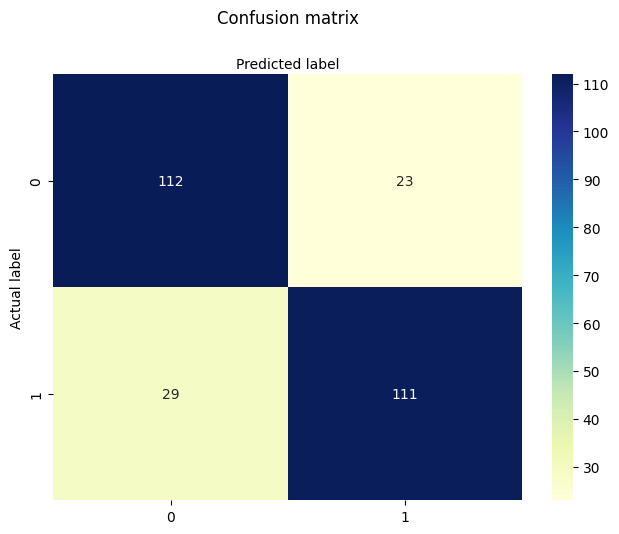

In [29]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [30]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))

0.8283582089552238
0.7928571428571428


In [32]:
from sklearn.metrics import classification_report

# Replace diabetes labels with Titanic survival labels
target_names = ['Did not survive', 'Survived']

print(classification_report(y_test, y_pred, target_names=target_names))


                 precision    recall  f1-score   support

Did not survive       0.79      0.83      0.81       135
       Survived       0.83      0.79      0.81       140

       accuracy                           0.81       275
      macro avg       0.81      0.81      0.81       275
   weighted avg       0.81      0.81      0.81       275



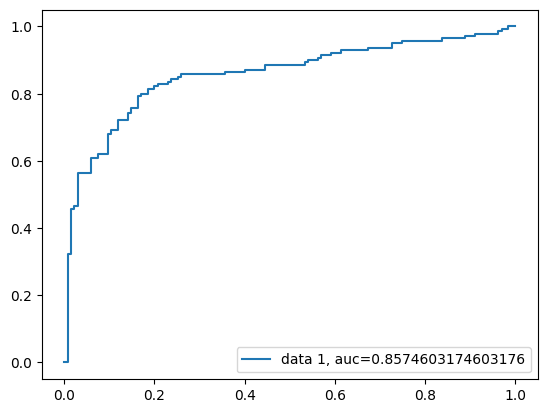

In [33]:
#Roc
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()